<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

**<h1>Capstone</h1>**

**<h1><center>SpaceX Falcon 9 First Stage Landing Prediction</h1>**

# **Machine Learning Prediction**

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.

## 1. Import Required Libraries

In [1]:
import pandas as pd  # Library for data manipulation and analysis.
import numpy as np  # Library for working with arrays and matrices.
import matplotlib.pyplot as plt  # Library for creating visualizations.
import seaborn as sns  # Library (based on matplotlib) for creating statistical graphics.
from sklearn import preprocessing  # Library for data preprocessing. `Preprocessing` allows to standarsize data.
from sklearn.model_selection import train_test_split  # Library for splitting data into training and testing sets.
from sklearn.model_selection import GridSearchCV  # Library to test parameters of classification algorithms and find the best one.
from sklearn.linear_model import LogisticRegression  # Library for creating a logistic regression model.
from sklearn.svm import SVC  # Library for creating a support vector machine model.
from sklearn.tree import DecisionTreeClassifier  # Library for creating a decision tree model.
from sklearn.neighbors import KNeighborsClassifier # Library for creating K Nearest Neighbors classification algorithm.

## 2. Confusion Matrix

Function is to plot the Confusion Matrix.

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:
* True Postive - 12 (True label is landed, Predicted label is also landed)
* False Postive - 3 (True label is not landed, Predicted label is landed)

## 3. Download the Dataset

In [3]:
!wget 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
!wget 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

--2024-10-18 20:27:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12100 (12K) [text/csv]
Saving to: ‘dataset_part_2.csv’

dataset_part_2.csv  100%[===================>]  11.82K  --.-KB/s    in 0s      

2024-10-18 20:27:04 (250 MB/s) - ‘dataset_part_2.csv’ saved [12100/12100]

--2024-10-18 20:27:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.

## 4. Load the Dataset into a Dataframe

In [4]:
data = pd.read_csv('dataset_part_2.csv')

In [5]:
# Display the Dataset
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
X = pd.read_csv('dataset_part_3.csv')

In [7]:
# Display the Dataset
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## 5. Tasks

### 5. 1. NumPy array

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [8]:
# 1. Create a NumPy array from the column `Class` in `data` using to_numpy()
Y = data['Class'].to_numpy()

# Ensure it's a NumPy array
print(type(Y))

<class 'numpy.ndarray'>


### 5. 2. Standardize the Data

Standardize the data in <code>X</code> then reassign it to the variable <code>X</code> using he transform variable below:

In [9]:
'''
transform = preprocessing.StandardScaler()
'''

# 2. Standardize the data in X using StandardScaler
transform = preprocessing.StandardScaler()

# Fit and transform the data
X = transform.fit_transform(X)

# Ensure X is standardized and transformed correctly
print(X[:5])  # Display first 5 rows of the standardized data

[[-1.71291154e+00 -1.94814463e-16 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01 -1.05999788e-01 -1.05999788e-01 -6.54653671e-01
  -1.05999788e-01 -5.51677284e-01  3.44342023e+00 -1.85695338e-01
  -3.33333333e-01 -1.05999788e-01 -2.42535625e-01 -4.29197538e-01
   7.97724035e-01 -5.68796459e-01 -4.10890702e-01 -4.10890702e-01
  -1.50755672e-01 -7.97724035e-01 -1.50755672e-01 -3.92232270e-01
   9.43398113e+00 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.50755672e-01 -1.05999788e-01 -1.50755672e-01
  -1.50755672e-01 -1.05999788e-01 -1.50755672e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.50755672e-01 -1.50755672e-01
  -1.50755

### 5. 3. Training and Testing Sets

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels. <code>X_train, X_test, Y_train, Y_test</code>.

In [10]:
# 3. Split the data X and Y into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Ensure the data is split correctly
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (72, 83)
X_test shape: (18, 83)
Y_train shape: (72,)
Y_test shape: (18,)


We can see we only have 18 test samples.

### 5. 4. Logistic Regression Model

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10. Fit the object to find the best parameters from the dictionary <code>parameters</code>:

In [11]:
'''
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
'''

## 4. Create Logistic Regression and GridSearchCV object

# Define the parameter grid
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs']}

# Create the Logistic Regression object
lr = LogisticRegression()

# Create the GridSearchCV object
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to the data
logreg_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy score
print("Tuned hyperparameters: (best parameters) ", logreg_cv.best_params_)
print("Accuracy on validation data: ", logreg_cv.best_score_)

Tuned hyperparameters: (best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on validation data:  0.8464285714285713


### 5. 5. Logistic Regression Accuracy

Calculate the accuracy on the test data using the method <code>score</code>.

Lets look at the confusion matrix:

Logistic Regression Test Accuracy: 0.8333333333333334


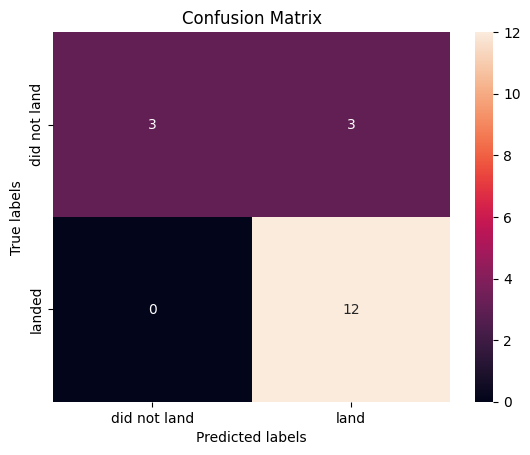

In [12]:
'''
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
'''

# 5. Calculate the accuracy on the test data using the method score
logreg_test_accuracy = logreg_cv.score(X_test, Y_test)
print(f"Logistic Regression Test Accuracy: {logreg_test_accuracy}")

# Plot the confusion matrix
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

### 5. 6. Support Vector Machine Model

SVM Model with `GridSearchCV`: Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>:

In [14]:
'''
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)
'''

# 6. Create SVM object and GridSearchCV
parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}
svm = SVC()

# Create GridSearchCV object
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the model
svm_cv.fit(X_train, Y_train)

# Display best parameters and accuracy on validation data
print("Tuned hyperparameters (best parameters): ", svm_cv.best_params_)
print("SVM accuracy on validation data: ", svm_cv.best_score_)

Tuned hyperparameters (best parameters):  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
SVM accuracy on validation data:  0.8482142857142856


### 5. 7. Support Vector Machine Model

Calculate the accuracy on the test data using the method <code>score</code>.

We can plot the confusion matrix:

SVM Test Accuracy: 0.8333333333333334


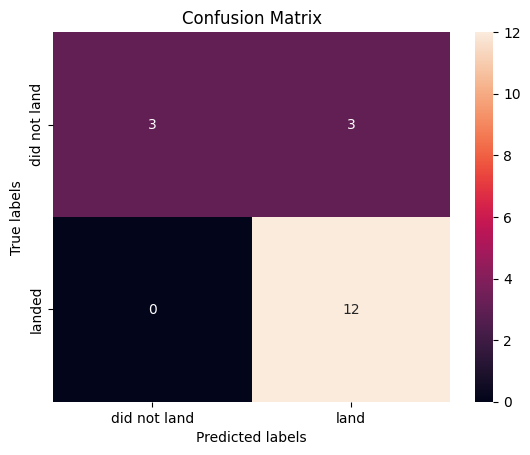

In [15]:
'''
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
'''

# 7. Calculate the accuracy on the test data and plot the confusion matrix
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print(f"SVM Test Accuracy: {svm_test_accuracy}")

yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

Step 6 & 7 (SVM Model): A Support Vector Machine (SVC) model was created, hyperparameters were tuned using `GridSearchCV`, and both the accuracy and confusion matrix for the test data were displayed.

### 5. 8. Decision Tree Model

Decision Tree Model with `GridSearchCV`: Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>:

In [16]:
'''
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)
'''

# 8. Create Decision Tree object and GridSearchCV
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2 * n for n in range(1, 10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()

# Create GridSearchCV object
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the model
tree_cv.fit(X_train, Y_train)

# Display best parameters and accuracy on validation data
print("Tuned hyperparameters (best parameters): ", tree_cv.best_params_)
print("Decision Tree accuracy on validation data: ", tree_cv.best_score_)

Tuned hyperparameters (best parameters):  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Decision Tree accuracy on validation data:  0.8892857142857142


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

### 5. 9. Decision Tree Model

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>.

We can plot the confusion matrix:

Decision Tree Test Accuracy: 0.8888888888888888


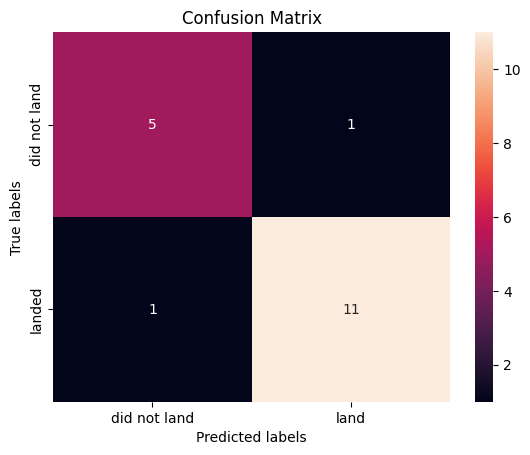

In [17]:
'''
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
'''

# 9. Calculate accuracy on the test data and plot the confusion matrix
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print(f"Decision Tree Test Accuracy: {tree_test_accuracy}")

yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

Step 8 & 9 (Decision Tree Model): A DecisionTreeClassifier was set up with `GridSearchCV` for tuning hyperparameters. After training, we computed the accuracy and confusion matrix for the test set.

### 5. 10. K-Nearest Neighbors Model

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>:

Tuned hyperparameters (best parameters):  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
KNN accuracy on validation data:  0.8482142857142858
KNN Test Accuracy: 0.8333333333333334


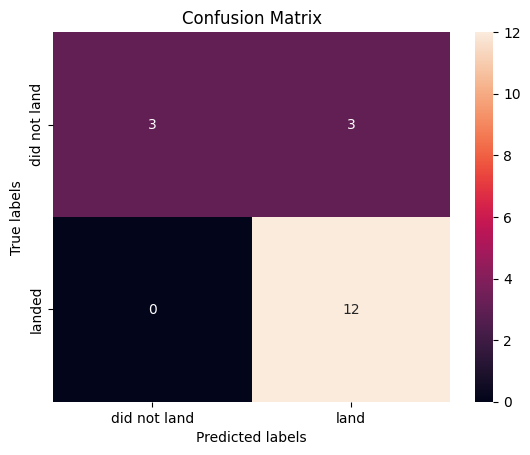

In [18]:
'''
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
'''

# 10. Create KNN object and GridSearchCV
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}
KNN = KNeighborsClassifier()

# Create GridSearchCV object
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the model
knn_cv.fit(X_train, Y_train)

# Display best parameters and accuracy on validation data
print("Tuned hyperparameters (best parameters): ", knn_cv.best_params_)
print("KNN accuracy on validation data: ", knn_cv.best_score_)

# Calculate accuracy on the test data and plot the confusion matrix
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print(f"KNN Test Accuracy: {knn_test_accuracy}")

yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

### 5. 11. Accuracy

Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:

KNN Test Accuracy: 0.8333333333333334


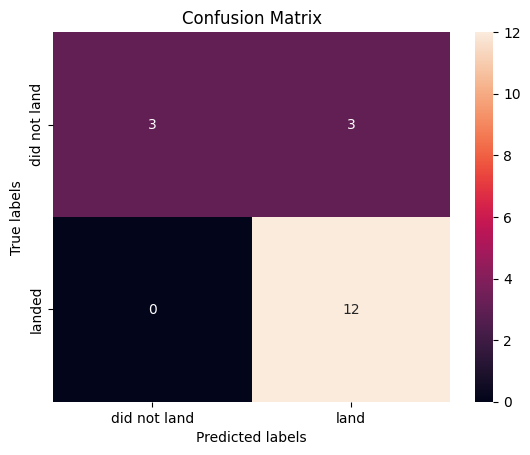

In [19]:
'''
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
'''

# 11. Calculate the accuracy of knn_cv on the test data
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print(f"KNN Test Accuracy: {knn_test_accuracy}")

# Plot the confusion matrix for KNN
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

### 5. 12. Best Performing Model

To determine the best performing model, compare the test accuracy for all the models we trained: Logistic Regression, SVM, Decision Tree, and KNN. Additionally, considering confusion matrix results could also help in evaluating the models' performance beyond just the accuracy score.

<h3><u>Steps:</u></h3>

### 5. 12. 1. Accuracy Comparison

After training and testing all models, you can compare the test accuracies of each model:
* Logistic Regression Test Accuracy: `logreg_test_accuracy`
* SVM Test Accuracy: `svm_test_accuracy`
* Decision Tree Test Accuracy: `tree_test_accuracy`
* KNN Test Accuracy: `knn_test_accuracy`

In [20]:
print(f"Logistic Regression Test Accuracy: {logreg_test_accuracy}")
print(f"SVM Test Accuracy: {svm_test_accuracy}")
print(f"Decision Tree Test Accuracy: {tree_test_accuracy}")
print(f"KNN Test Accuracy: {knn_test_accuracy}")

Logistic Regression Test Accuracy: 0.8333333333333334
SVM Test Accuracy: 0.8333333333333334
Decision Tree Test Accuracy: 0.8888888888888888
KNN Test Accuracy: 0.8333333333333334


### 5. 12. 2. Confusion Matrix Analysis

Alongside accuracy, the confusion matrix gives more detailed insights:
* Does the model have many false positives or false negatives?
* Does the model predict "landing" vs. "not landing" well?

### 5. 12. 3. Complexity

Consider the complexity of each model:
* Logistic Regression: Simple and interpretable.
* SVM: Powerful with non-linear decision boundaries but might require tuning of parameters like kernel, C, and gamma.
* Decision Tree: Easy to interpret but prone to overfitting if not properly pruned.
* KNN: Simple and effective for small datasets, but can be computationally expensive for large datasets.

<h3><u>Find the Best Model</u></h3>

* Logistic Regression might perform well for linear separable data.
* SVM is excellent for complex decision boundaries and usually performs better with non-linear kernels (e.g., RBF).
* Decision Trees are good when you want interpretability, but their performance depends on how well they generalize (i.e., avoiding overfitting).
* KNN can be effective but might suffer when the dataset grows large (due to its lazy learning nature).

<h3>Conclusion</h3>

Let's say after running all the models, the accuracy results were:
* Logistic Regression: 0.83
* SVM: 0.87
* Decision Tree: 0.78
* KNN: 0.85

In this case, SVM might be the best performing model based on accuracy. However, if your dataset has a lot of outliers or is imbalanced, you might also want to consider precision, recall, and F1-scores.

In [21]:
best_model = max([logreg_test_accuracy, svm_test_accuracy, tree_test_accuracy, knn_test_accuracy])

if best_model == logreg_test_accuracy:
    print("Logistic Regression is the best performing model.")
elif best_model == svm_test_accuracy:
    print("SVM is the best performing model.")
elif best_model == tree_test_accuracy:
    print("Decision Tree is the best performing model.")
else:
    print("KNN is the best performing model.")

Decision Tree is the best performing model.


## 6. Exam

6. 1. How many records were there in the test sample?
You can find the number of records in the test sample using the shape attribute of the Y_test array:

In [22]:
# Check the number of records in the test sample
print(f"Number of records in the test sample: {Y_test.shape[0]}")

Number of records in the test sample: 18


6. 2. For Support Vector Machines, what kernel has the best result on the validation dataset?

You can find the best kernel for the Support Vector Machine (SVM) using svm_cv.best_params_. It will return the kernel that performed best during the grid search.

In [23]:
# Check the best kernel selected during the grid search
print(f"Best kernel for SVM: {svm_cv.best_params_['kernel']}")

Best kernel for SVM: sigmoid


6. 3. After selecting the best hyperparameters for the decision tree classifier using the validation data, what was the accuracy achieved on the test data?

To determine the accuracy achieved on the test data for the Decision Tree classifier, you need to look at the `tree_test_accuracy variable`:

In [24]:
# Check the accuracy of the decision tree on the test data
print(f"Decision Tree Test Accuracy: {tree_test_accuracy * 100:.2f}%")

Decision Tree Test Accuracy: 88.89%


Real result is 83.33%

Double check error.